In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise – 1

In [2]:

dict={'x':[0,0.5,1,1.5,2,2.5,3,3.5],'y':[2,1.5,1.5,1,1,0,-0.5,-2]}

# Data

In [3]:

data=pd.DataFrame(dict)
data

,x,y
0,0.0,2.0
1,0.5,1.5
2,1.0,1.5
3,1.5,1.0
4,2.0,1.0
5,2.5,0.0
6,3.0,-0.5
7,3.5,-2.0


# Mean

In [4]:
xmean=np.mean(data['x'])
ymean=np.mean(data['y'])
print('X mean :',xmean,"\nY mean :",ymean)

X mean : 1.75 
Y mean : 0.5625


In [5]:
x_xmean=[]
for i in data['x']:
#     print(i)
    x_xmean.append(i-xmean)
x_xmean

[-1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75]

In [6]:
y_ymean=[]
for i in data['y']:
    y_ymean.append(i-ymean)
y_ymean

[1.4375, 0.9375, 0.9375, 0.4375, 0.4375, -0.5625, -1.0625, -2.5625]

In [7]:
x_xmean_sq=[]
for i in x_xmean:
    x_xmean_sq.append(i**2)
x_xmean_sq

[3.0625, 1.5625, 0.5625, 0.0625, 0.0625, 0.5625, 1.5625, 3.0625]

# Denom_sum

In [8]:
denom_sum=0
for i in x_xmean_sq:
    denom_sum=denom_sum+i
denom_sum

10.5

In [9]:
num_mul=[]
for i,j in zip(x_xmean,y_ymean):
    num_mul.append(i*j)
num_mul

[-2.515625,
 -1.171875,
 -0.703125,
 -0.109375,
 0.109375,
 -0.421875,
 -1.328125,
 -4.484375]

# Numerator Sum

In [10]:
num_sum=0
for i in num_mul:
    num_sum=num_sum+i
num_sum

-10.625

In [11]:
beta=num_sum/denom_sum
beta

-1.0119047619047619

In [12]:
B_xmean=beta*xmean
B_xmean

-1.7708333333333333

## Alpha

In [13]:
alpha=ymean-B_xmean
alpha

2.333333333333333

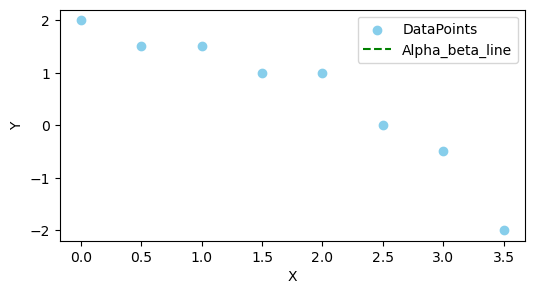

In [14]:
plt.figure(figsize=(6,3))
plt.scatter(data['x'],data['y'],color='skyblue',label='DataPoints')
plt.plot(alpha,beta,color='green',linestyle='--',label='Alpha_beta_line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise - 2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:

df={'X1':[60,62,67,70,71,72,75,78],'X2':[22,25,24,20,15,14,14,11],'Y':[140,155,159,179,192,200,212,215]}
data=pd.DataFrame(df)
data

,X1,X2,Y
0,60,22,140
1,62,25,155
2,67,24,159
3,70,20,179
4,71,15,192
5,72,14,200
6,75,14,212
7,78,11,215


In [17]:
theta0=0.1
theta1=0.5
theta2=0.2

# hypothesis

In [18]:
def hyp(x1,x2,theta0,theta1,theta2):
    
    return [theta0 + theta1*i+theta2*j for i,j in zip(x1,x2)]

hypo=hyp(data['X1'],data['X2'],theta0,theta1,theta2)


## MSE

In [19]:
def MSE(prediction,target):
    m=len(data)
    error=0.0
    for prediction,target in zip(prediction,target):
        error+=(prediction-target)**2
        
    mae_error=(1.0/(2*m))*error
    return mae_error

In [20]:
MSE_error=MSE(hypo,data['Y'])
MSE_error

10530.428125

In [21]:
def gdc_0(m,theta0,theta1,theta2,alpha=0.02):
    
    for i in range(1,m):
        predict=hyp(data['X1'],data['X2'],theta0,theta1,theta2)
        mse2_error=MSE(predict,data['Y'])
        theta_0-=(alpha/m)*mse2_error
        theta_0_list.append(theta_0)
    return theta_0_list  

In [22]:
def gdc_1(m,theta0,theta1,theta2,alpha=0.02):
    
    for i in range(1,m):
        predict=hyp(data['X1'],data['X2'],theta0,theta1,theta2)
        mse2_error=MSE(predict,data['Y'])
        theta_1-=(alpha/m)*mse2_error
        theta_1_list.append(theta_1)
        
    return theta_1_list  

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
X=np.array([[60,22],[62,25],[67,24],[70,20],[71,15],[72,14],[75,14],[78,11]])

In [25]:
X

array([[60, 22],
       [62, 25],
       [67, 24],
       [70, 20],
       [71, 15],
       [72, 14],
       [75, 14],
       [78, 11]])

reg=LinearRegression().fit(X,data['Y'])
reg

In [27]:
reg.score(X, data['Y'])

0.9626163798011392

In [28]:
reg.coef_

array([ 3.1478931 , -1.65614327])

In [29]:
reg.predict(np.array([[3, 5]]))

array([-5.70452428])

# Final 

X mean: 1.75
Y mean: 0.5625
Slope (beta): -1.0119047619047619
Intercept (alpha): 2.333333333333333


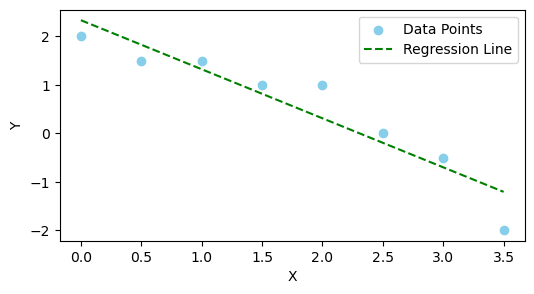

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = pd.DataFrame({'x': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5],
                     'y': [2, 1.5, 1.5, 1, 1, 0, -0.5, -2]})

# Calculate means of x and y
xmean = np.mean(data['x'])
ymean = np.mean(data['y'])
print('X mean:', xmean)
print('Y mean:', ymean)

# Calculate numerator and denominator for slope (beta)
data['x_xmean'] = data['x'] - xmean
data['y_ymean'] = data['y'] - ymean
data['x_xmean_sq'] = data['x_xmean'] ** 2
data['x_xmean_y_ymean'] = data['x_xmean'] * data['y_ymean']

numerator = data['x_xmean_y_ymean'].sum()
denominator = data['x_xmean_sq'].sum()

beta = numerator / denominator  # Slope
alpha = ymean - beta * xmean    # Intercept

print('Slope (beta):', beta)
print('Intercept (alpha):', alpha)

# Plotting
plt.figure(figsize=(6, 3))
plt.scatter(data['x'], data['y'], color='skyblue', label='Data Points')
plt.plot(data['x'], alpha + beta * data['x'], color='green', linestyle='--', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Final theta0: 0.04590901117027955
Final theta1: 2.6277355408816194
Predictions:
0    157.710041
1    162.965513
2    176.104190
3    183.987397
4    186.615132
5    189.242868
6    197.126075
7    205.009281
Name: X, dtype: float64
R-squared (Accuracy): 78.68%


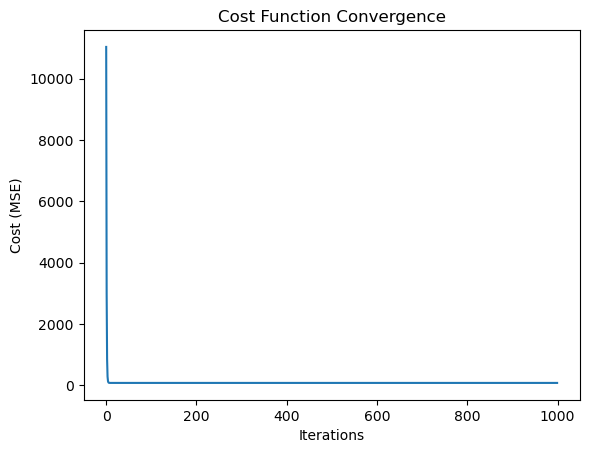

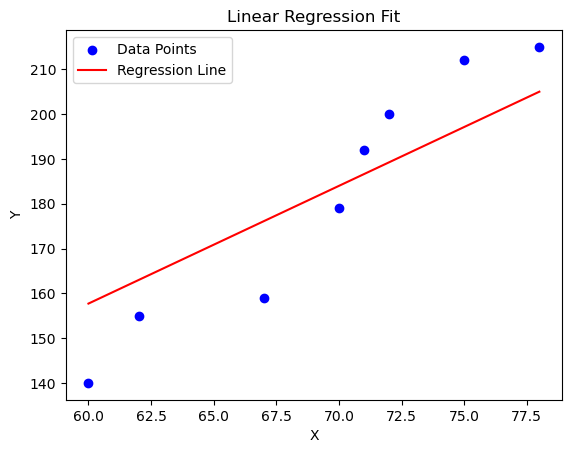

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given data
df = {
    'X': [60, 62, 67, 70, 71, 72, 75, 78],
    'Y': [140, 155, 159, 179, 192, 200, 212, 215]
}
data = pd.DataFrame(df)

# Hypothesis function
def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x

# Mean Squared Error (MSE) function
def MSE(predictions, targets):
    m = len(targets)
    return (1 / (2 * m)) * np.sum((predictions - targets) ** 2)

# Gradient Descent function
def gradient_descent(data, theta0, theta1, alpha, iterations):
    m = len(data)
    cost_history = []
    theta0_history, theta1_history = [theta0], [theta1]

    for _ in range(iterations):
        predictions = hypothesis(data['X'], theta0, theta1)
        error = predictions - data['Y']

        # Update parameters
        theta0 -= alpha * (1 / m) * np.sum(error)
        theta1 -= alpha * (1 / m) * np.sum(error * data['X'])

        # Append to history for visualization
        cost_history.append(MSE(predictions, data['Y']))
        theta0_history.append(theta0)
        theta1_history.append(theta1)

    return theta0, theta1, cost_history, theta0_history, theta1_history

# Initial parameters
theta0, theta1 = 0.1, 0.5
alpha = 0.0001  # Learning rate
iterations = 1000

# Perform gradient descent
final_theta0, final_theta1, cost_history, _, _ = gradient_descent(data, theta0, theta1, alpha, iterations)

# Print final parameters
print(f"Final theta0: {final_theta0}")
print(f"Final theta1: {final_theta1}")

# Predictions
predictions = hypothesis(data['X'], final_theta0, final_theta1)
print("Predictions:")
print(predictions)

# Calculate R-squared accuracy
ss_total = np.sum((data['Y'] - np.mean(data['Y'])) ** 2)
ss_residual = np.sum((data['Y'] - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared (Accuracy): {r_squared * 100:.2f}%")

# Plot cost convergence
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()

# Plot predictions
plt.scatter(data['X'], data['Y'], color='blue', label='Data Points')
plt.plot(data['X'], predictions, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()
